<a href="https://colab.research.google.com/github/Ramandeep077/data-analytic-Raman/blob/main/Assignment2_predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder # usually uses this label encoder to convert binary categories to number
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.impute import SimpleImputer
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Predictive/heart_disease_uci.csv')

In [ ]:
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Check for missing values
print(dataset.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


DATASET INFORMATION SUMMARY
--------------------------------------------------
1. The dataset contains 920 entries across 16 features pertinent to heart disease studies.
2. Complete data is available for 'id', 'age', 'sex', 'dataset', 'cp', and the outcome variable 'num'.
3. Significant missing data is found in 'ca' with 66.41% missing.
4. Significant missing data is found in 'thal' with 52.83% missing.
5. 'Slope' also has a considerable amount of missing data, with only 611 non-null entries.
6. Variables 'trestbps', 'chol', 'fbs', 'thalch', 'exang', and 'oldpeak' have some missing values but to a lesser extent.

In [ ]:


# Drop columns with missing values # Removing these columns due to high missing values
dataset_cleaned = dataset.drop(columns=['slope', 'ca', 'thal'])


In [ ]:
# Check for missing values
print(dataset_cleaned.isnull().sum())

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
num          0
dtype: int64


In [ ]:
# Columns for median imputation
numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Impute missing numeric values with the median
numeric_imputer = SimpleImputer(strategy='median')
dataset_cleaned[numeric_columns] = numeric_imputer.fit_transform(dataset_cleaned[numeric_columns])

In [ ]:
# Check for missing values
print(dataset_cleaned.isnull().sum())

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         90
restecg      2
thalch       0
exang       55
oldpeak      0
num          0
dtype: int64


In [ ]:
# Columns for mode imputation
categorical_columns = ['fbs', 'restecg', 'exang']  # 'slope', 'ca', 'thal' have already been dropped

# Impute missing categorical values with the most frequent (mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
dataset_cleaned[categorical_columns] = categorical_imputer.fit_transform(dataset_cleaned[categorical_columns])

In [ ]:
# Check for any remaining missing values
print(dataset_cleaned.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


## dealing with outliers

In [ ]:
df=dataset_cleaned #change the dataset name for to easy use

In [ ]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

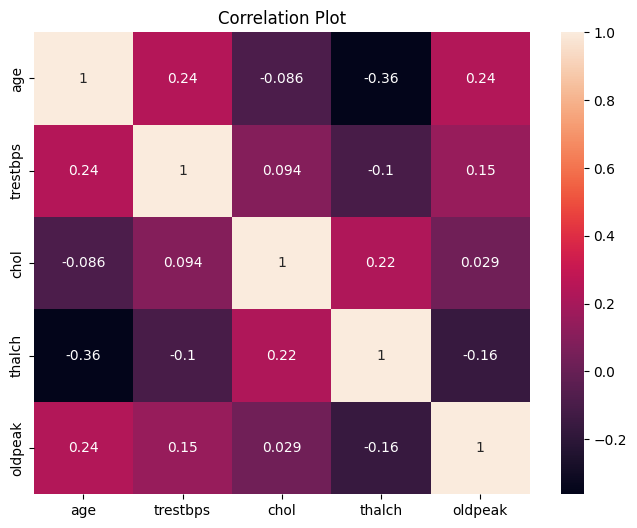

In [ ]:
# Draw the correaltion plot:
df_corr = ['age','trestbps','chol','thalch','oldpeak']
plt.figure(figsize=(8, 6))
sns.heatmap(df[df_corr].corr(), annot=True)
plt.title("Correlation Plot")
plt.show()

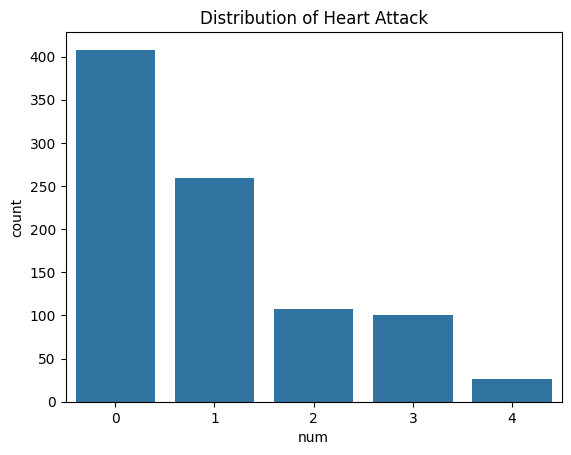

In [ ]:
# Explore the distribution of the target variable
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Attack')
plt.show()

## scaling the numeric section

##Statistical Description

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,461.128746,53.497225,131.619312,199.139845,137.819090,0.826748,0.975583
std,266.028351,9.447942,17.045769,106.812517,25.029616,0.997634,1.130124
min,1.000000,28.000000,80.000000,0.000000,63.000000,-2.000000,0.000000
25%,233.000000,47.000000,120.000000,179.000000,120.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,692.000000,60.000000,140.000000,266.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,185.000000,518.000000,202.000000,4.000000,4.000000


#Observations:

##According to this dataset:

###1.minimum age for heart disease is 28.
###2.Average age of heart disease patients is 53.5
###3.75 percent of heart patients have age greater than 47.
###4.Maximum heart rate achieved(thalch) start from 60 and end at 202.
###5.Between 25-50 percent of people, most of the people did not had any heart disease.







OBSERVATIONS FROM SUMMARY STATISTICS
--------------------------------------------------
1. There are no heart diseases found in the 25% of the patients with an average of age 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average of age 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average of age 60.0 or more.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
df.fillna("Missing", inplace = True)

#Let's see visual representation of age column

<Axes: xlabel='age', ylabel='Count'>

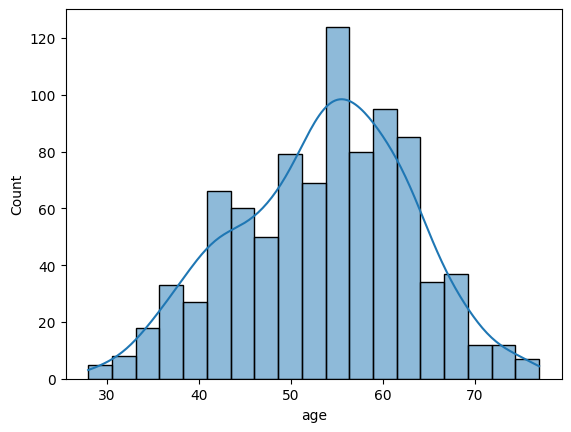

In [ ]:
# for normality check,,,# Draw a histogram to visualize the distribution of the age column
sns.histplot(data=df['age'],kde=True)

Mean: 53.497225305216425
Median: 54.0
Mode: 54


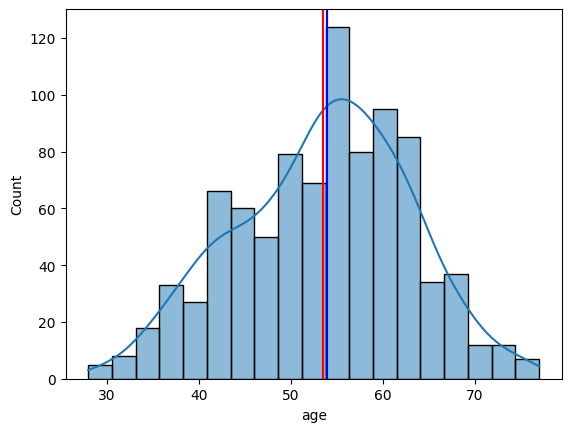

In [ ]:
# Plot the mean, median and mode of each column using sns
sns.histplot(df["age"], kde=True)
plt.axvline(df["age"].mean(), color="r")
plt.axvline(df["age"].median(), color="g")
plt.axvline(df["age"].mode()[0], color="b")


# Print the mean, median and mode of each column
print("Mean:", df["age"].mean())
print("Median:", df["age"].median())
print("Mode:", df["age"].mode()[0])


Exploring `sex` (Male/Female) Feature

In [ ]:
# find the count of male and female in sex column
df["sex"].value_counts()

,count
sex,
Male,711
Female,190


##Scaling

In [ ]:
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
    # Create a new MinMaxScaler for the column
    scaler = MinMaxScaler()

    # Fit and transform the data
    df[col] = scaler.fit_transform(df[[col]])

    # Store the scaler in the dictionary
    min_max_scalers[col] = scaler


##label encoder

In [ ]:
#  # apply labelencoder on categorical column
for col in df.columns:
      if df[col].dtype == "category" or df[col].dtype == "object":
          df[col] =LabelEncoder().fit_transform(df[col])
      else:
          pass

In [ ]:
# split data into X and y
X = df.drop('num', axis=1)
X = (X - X.min()) / (X.max() - X.min())
y = df['num']


In [ ]:
 #data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##KNN

In [ ]:
# Check the shapes
print(X_train.shape)  # Should output (630, n_features) if the number of samples is 630
print(len(y_train))   # Should output 630


(720, 12)
720


In [ ]:
# model = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)

yhat_train = knn.predict(X_train)
yhat_test = knn.predict(X_test)

print("Train evaluation:")
print(accuracy_score(y_train, yhat_train))
print("Test evaluation:")
print(accuracy_score(y_test, yhat_test))

Train evaluation:
1.0
Test evaluation:
0.6187845303867403


In [ ]:
## user defined function
## user defined function
# Function to calculate and print quality metrics
def quality_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # Use 'macro' or 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier ## If your target is categorical.
#from sklearn.neighbors import KNeighborsRegressor ## If your target is continuous

In [ ]:
#setting 2
# Define  model
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
# Fit the model
knn.fit(X_train, y_train)
# Predict the test set
y_pred = knn.predict(X_test)
# Evaluate the model
quality_metrics(y_test, y_pred)

Accuracy: 0.6022099447513812
Precision: 0.33764059196617335
Recall: 0.3300169950852051
F1 Score: 0.3279990935366189


In [ ]:
# Configuration 3
knn2 = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn2.fit(X_train, y_train)
y_pred_knn = knn2.predict(X_test)
accuracy2 = quality_metrics(y_test, y_pred_knn)

Accuracy: 0.6187845303867403
Precision: 0.3591245193729666
Recall: 0.35657985393413255
F1 Score: 0.3526984126984127


In [ ]:
## changing values of n-neigbours in KNN from 1 to 10 and print accuracy
acc = []
for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print("number of neigbours:", i)
  # simply take accuray
  acc.append(quality_metrics(y_test, y_pred))
  #print("Accuracy:", quality_metrics(y_test, y_pred_knn))
  print("\n" + "="*60 + "\n")

number of neigbours: 1
Accuracy: 0.5193370165745856
Precision: 0.31934720522235827
Recall: 0.33433696201368795
F1 Score: 0.3187239217262977


number of neigbours: 2
Accuracy: 0.569060773480663
Precision: 0.32832015810276677
Recall: 0.3183500987552249
F1 Score: 0.3131832945240962


number of neigbours: 3
Accuracy: 0.6077348066298343
Precision: 0.3084920634920635
Recall: 0.3189150705066373
F1 Score: 0.3075184926847331


number of neigbours: 4
Accuracy: 0.6077348066298343
Precision: 0.3456832820963256
Recall: 0.3411281061963162
F1 Score: 0.33676503632305915


number of neigbours: 5
Accuracy: 0.6464088397790055
Precision: 0.3697499264489556
Recall: 0.3648569197556383
F1 Score: 0.36137931034482756


number of neigbours: 6
Accuracy: 0.6077348066298343
Precision: 0.35355144363993923
Recall: 0.34017730007808555
F1 Score: 0.3363442742083519


number of neigbours: 7
Accuracy: 0.5966850828729282
Precision: 0.33507092198581556
Recall: 0.33434844517936707
F1 Score: 0.3266713017812831


number of ne

##Decision tree

In [ ]:

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dtree.fit(X_train, y_train)
# Predict on the test data
y_pred = dtree.predict(X_test)
# Evaluate the model
quality_metrics(y_test, y_pred)

Accuracy: 0.6022099447513812
Precision: 0.39336364784640643
Recall: 0.4064466492122548
F1 Score: 0.39593494006449476


In [ ]:
# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dtree.predict(X_test)
quality_metrics(y_test,y_pred_dt)

Accuracy: 0.6740331491712708
Precision: 0.40164447479230675
Recall: 0.3953470212668228
F1 Score: 0.3843020367610531


In [ ]:
# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree = DecisionTreeClassifier(max_depth=4)
# Fit the model on the training data
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred_dtt = dtree.predict(X_test)
quality_metrics(y_test,y_pred_dtt)

Accuracy: 0.6850828729281768
Precision: 0.3542424242424243
Recall: 0.402126682283772
F1 Score: 0.3766356229556943


In [ ]:
from sklearn.metrics import classification_report
for depth in range(3, 8):
    # Create the model with the specified max_depth
    dtree= DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(X_train, y_train)

    # Predict on the test set
    y_pred_dt = dtree.predict(X_test)

    # Calculate and print the metrics
    accuracy = accuracy_score(y_test, y_pred_dt)
    conf_matrix = confusion_matrix(y_test, y_pred_dt)
    class_report = classification_report(y_test, y_pred_dt)

    print(f"Model with Depth {depth}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

    print("\n" + "="*60 + "\n")

Model with Depth 3
Accuracy: 0.6464088397790055
Confusion Matrix:
[[78  4  0  0  0]
 [20 39  0  0  0]
 [ 9  9  0  0  0]
 [ 8 10  0  0  0]
 [ 2  2  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.95      0.78        82
           1       0.61      0.66      0.63        59
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         4

    accuracy                           0.65       181
   macro avg       0.26      0.32      0.28       181
weighted avg       0.50      0.65      0.56       181



Model with Depth 4
Accuracy: 0.6850828729281768
Confusion Matrix:
[[76  5  1  0  0]
 [10 41  8  0  0]
 [ 2  9  7  0  0]
 [ 6  9  3  0  0]
 [ 1  2  1  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        82
           1       0.62      0.69      0

In [ ]:
## Checking our baseline accuracy of heart attack
y.value_counts(normalize=True)


,proportion
num,
0,0.452830
1,0.287458
2,0.119867
3,0.110988
4,0.028857


In [ ]:
# Evaluate KNN model with 5 neighbour
print("KNN Model:")
quality_metrics(y_test, y_pred_knn)
print("\n" + "="*60 + "\n")
# Evaluate Decision Tree model with 4 neighbour
print("Decision Tree Model:")
quality_metrics(y_test, y_pred_dtt)


KNN Model:
Accuracy: 0.6187845303867403
Precision: 0.3591245193729666
Recall: 0.35657985393413255
F1 Score: 0.3526984126984127


Decision Tree Model:
Accuracy: 0.6850828729281768
Precision: 0.3542424242424243
Recall: 0.402126682283772
F1 Score: 0.3766356229556943
